<a href="https://colab.research.google.com/github/NacereddineRebouh/Calculator/blob/master/TP_2_Histogrammes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [BACHA Yassine & REBOUH Nacereddine | M2 IV - Groupe 2]

# TP à rendre 2 Egalisation d'histogrammes
Dans ce TP, nous aimerions améliorer le contraste d'images par deux méthodes. Une méthode d'expansion de la dynamique, et une méthode d'égalisaton d'histogramme. La première image à traiter est dans un fichier npy à loader. Le reste des images sont dans le même dossier. 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Lire et afficher l'image à utiliser

In [2]:
image = np.genfromtxt('image.csv', delimiter=';')

OSError: ignored

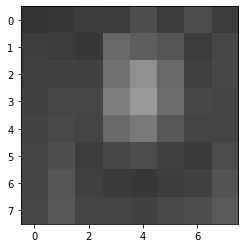

In [ ]:
plt.imshow(image,cmap='gray')
plt.clim(0, 256)
plt.show()

# Calculer les métriques sur l'image
1.	Calculer la moyenne de luminance de l’image.
2.	Donner la dynamique de l’image (intervalle [Lmin, Lmax]).
3.	Calculer le contraste de l’image.
4.	Calculer l’écart type des niveaux de gris de l’image.


In [ ]:
shape = image.shape[0] * image.shape[1]
moy = 0
Lmin = 255
Lmax = 0

for j in image:
  for i in j:
    moy += i
    if Lmax < i: Lmax = i
    if Lmin > i: Lmin = i

moy /= shape

contrast = (Lmax - Lmin) / (Lmax + Lmin)

ecart_type = 0
for j in image:
  for i in j:
    ecart_type += (i - moy) ** 2

ecart_type /= shape

print("moy="+str(moy))
print("max="+str(Lmax))
print("min="+str(Lmin))
print("contrast="+str(contrast))
print("ecart type="+str(ecart_type))

moy=76.078125
max=154.0
min=52.0
contrast=0.49514563106796117
ecart type=437.509521484375


# Histogramme et histogramme cumulé
5.	Construire l’histogramme de cette image ainsi que son histogramme normalisé.
6.	Construire l’histogramme cumulé de cette image ainsi que son histogramme cumulé normalisé.


### Histogramme:

<BarContainer object of 256 artists>

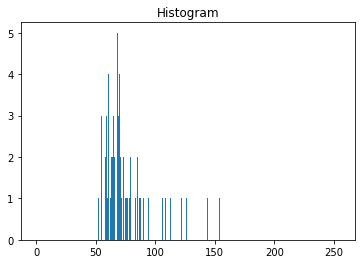

In [ ]:
hist = np.zeros(256)
pixel_values = [i for i in range(256)]

for i in image.flatten():
  hist[int(i)] += 1

plt.title("Histogram")
plt.bar(pixel_values, hist)

### Histogramme normalisé:

<BarContainer object of 256 artists>

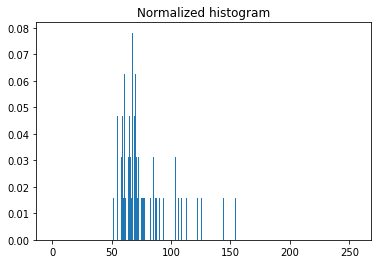

In [ ]:
hist_norm = []
for i in hist:
   hist_norm.append(i / shape)

plt.title("Normalized histogram")
plt.bar(pixel_values, hist_norm)

### Histogramme cumulé:

<BarContainer object of 256 artists>

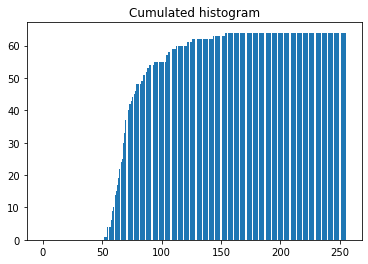

In [ ]:
hist_cum = []
history = 0
for i in hist:
  hist_cum.append(i + history)
  history += i

plt.title("Cumulated histogram")
plt.bar(pixel_values, hist_cum)

### Histogramme cumulé normalisé:

<BarContainer object of 256 artists>

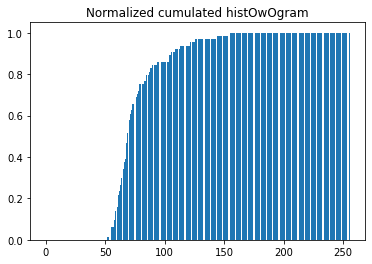

In [ ]:
hist_cum_norm = []
history = 0
for i in hist_norm:
  hist_cum_norm.append(i + history)
  history += i

plt.title("Normalized cumulated histOwOgram")
plt.bar(pixel_values, hist_cum_norm)

# Comparer votre implémentation aux fonctions de opencv

In [ ]:
image = image.astype(np.uint8)
cv2_hist = cv2.calcHist([image], [0], None, [256], [0,256])

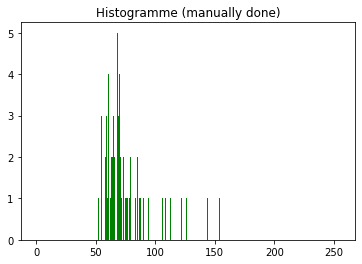

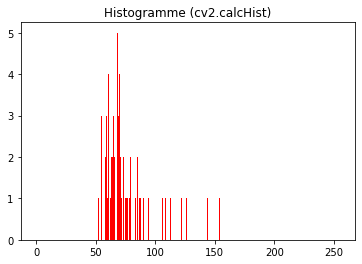

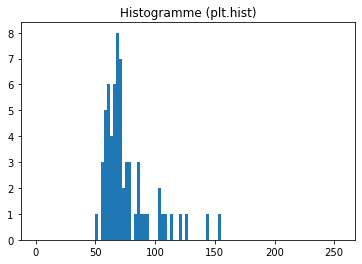

In [ ]:
plt.title("Histogramme (manually done)")
plt.bar(pixel_values, hist, color="green")
plt.show()

plt.title("Histogramme (cv2.calcHist)")
plt.bar(pixel_values, cv2_hist.flatten(), color="red")
plt.show()

plt.title("Histogramme (plt.hist)")
plt.hist(image.flatten(), bins=int(Lmax-Lmin), range=(0, 255))
plt.show()

Pas de difference? (verify before sending)

- Expliquer la difference.
- comparer aussi avec les méthodes des autres librairies.

# 7.	Etendre l’histogramme et visualiser l’image résultante.

In [ ]:
img_extended = []
for i in range(image.shape[0]):
  img_extended.append([])
  for j in range(image.shape[1]):
    img_extended[i].append(hist_cum_norm[int(image[i][j])] * 255)

img_extended = np.asarray(img_extended)

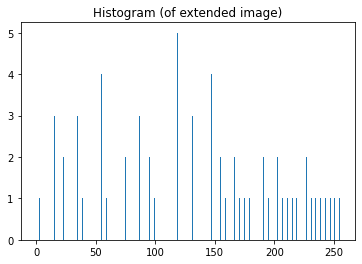

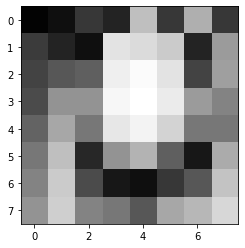

In [ ]:
sorted_extended = np.sort(img_extended.copy(), axis=None)
hist_extended = np.zeros(256)

for i in sorted_extended:
  hist_extended[int(i)] += 1

plt.title("Histogram (of extended image)")
plt.bar(pixel_values, hist_extended)
plt.show()

plt.imshow(img_extended, cmap="gray")
plt.clim(0, 256)
plt.show()

# 8.	Comparer les histogrammes des deux images ; originale et étendue

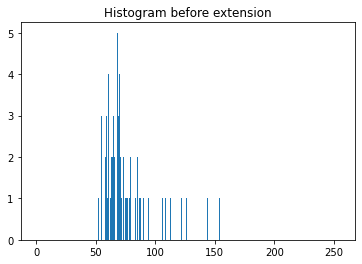

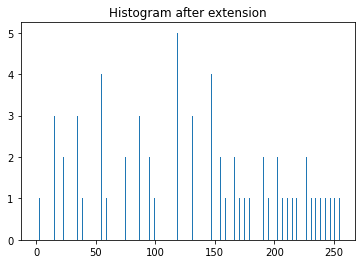

In [ ]:
plt.title("Histogram before extension")
plt.bar(pixel_values, hist)
plt.show()

plt.title("Histogram after extension")
plt.bar(pixel_values, hist_extended)
plt.show()

# Expansion de la dynamique et comparaison avec l'égalisation d'histogramme

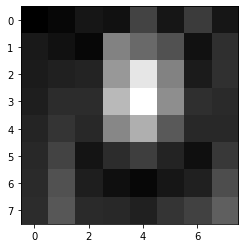

In [ ]:
#Expansion de la dynamique:
img_extended_no_hist = []

for i in range(image.shape[0]):
    img_extended_no_hist.append([])
    for j in range(image.shape[1]):
        img_extended_no_hist[i].append((((image[i][j] - Lmin) * 255)/(Lmax - Lmin)))

plt.imshow(img_extended_no_hist, cmap="gray")
plt.clim(0, 256)
plt.show()

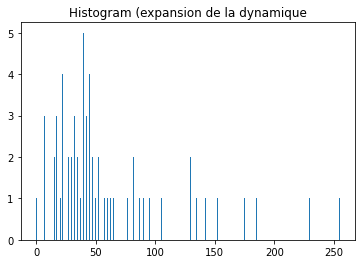

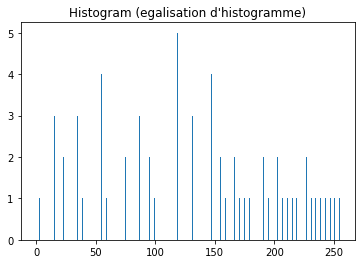

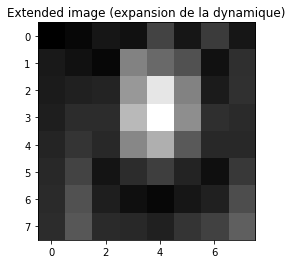

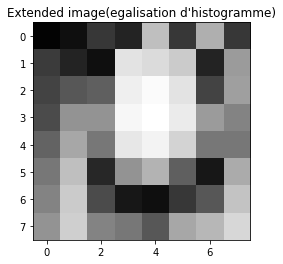

In [ ]:
hist_extended_2 = np.zeros(256)
for i in np.asarray(img_extended_no_hist).flatten():
  hist_extended_2[int(i)] += 1

plt.title("Histogram (expansion de la dynamique")
plt.bar(pixel_values, hist_extended_2)
plt.show()

plt.title("Histogram (egalisation d'histogramme)")
plt.bar(pixel_values, hist_extended)
plt.show()

plt.title("Extended image (expansion de la dynamique)")
plt.imshow(img_extended_no_hist, cmap="gray")
plt.clim(0, 256)
plt.show()

plt.title("Extended image(egalisation d'histogramme)")
plt.imshow(img_extended, cmap="gray")
plt.clim(0, 256)
plt.show()

# Améliorer le contraste des images données
améliorer le contraste des 3 images envoyées avec les méthodes implémentées precedemment.

### 1st method (expansion de la dynamique):

1st figure:

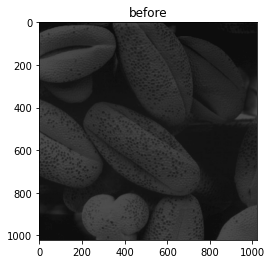

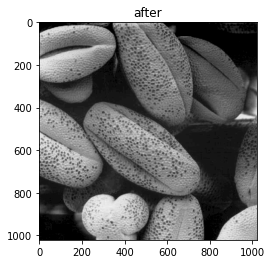

In [ ]:
image = cv2.imread('Fig0208(a).tif')
Lmax = np.amax(image)
Lmin = np.amin(image)
img_extended_no_hist = []

for i in range(image.shape[0]):
    img_extended_no_hist.append([])
    for j in range(image.shape[1]):
        img_extended_no_hist[i].append((((image[i][j][0] - Lmin) * 255) / (Lmax - Lmin)))

plt.title("before")
plt.imshow(image, cmap="gray")
plt.clim(0, 256)
plt.show()

plt.title("after")
plt.imshow(img_extended_no_hist, cmap="gray")
plt.clim(0, 256)
plt.show()

2nd figure:

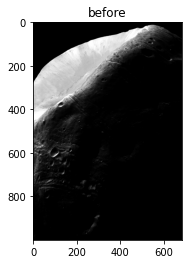

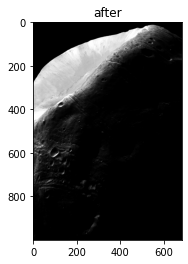

In [ ]:
image = cv2.imread('Fig0210(a).tif')
Lmax = np.amax(image)
Lmin = np.amin(image)
img_extended_no_hist = []

for i in range(image.shape[0]):
    img_extended_no_hist.append([])
    for j in range(image.shape[1]):
        img_extended_no_hist[i].append((((image[i][j][0] - Lmin) * 255) / (Lmax - Lmin)))

plt.title("before")
plt.imshow(image, cmap="gray")
plt.clim(0, 256)
plt.show()

plt.title("after")
plt.imshow(img_extended_no_hist, cmap="gray")
plt.clim(0, 256)
plt.show()

3rd figure:

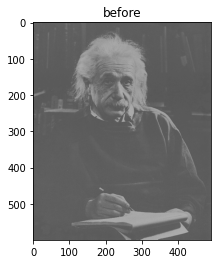

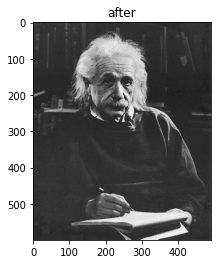

In [ ]:
image = cv2.imread('Fig0228(a).tif')
Lmax = np.amax(image)
Lmin = np.amin(image)
img_extended_no_hist = []

for i in range(image.shape[0]):
    img_extended_no_hist.append([])
    for j in range(image.shape[1]):
        img_extended_no_hist[i].append((((image[i][j][0] - Lmin) * 255) / (Lmax - Lmin)))

plt.title("before")
plt.imshow(image, cmap="gray")
plt.clim(0, 256)
plt.show()

plt.title("after")
plt.imshow(img_extended_no_hist, cmap="gray")
plt.clim(0, 256)
plt.show()

### 2nd method (egalisation d'histogramme):

1st figure:

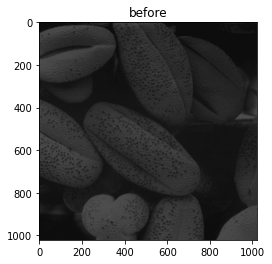

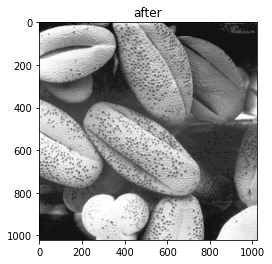

In [ ]:
image = cv2.imread('Fig0208(a).tif')
image = image[:, :, 0]
Lmax = np.amax(image)
Lmin = np.amin(image)
shape = image.shape[0] * image.shape[1]
#sorted = np.sort(image.copy(), axis=None)
hist = np.zeros(256)

for i in image.flatten():
  hist[int(i)] += 1

hist_norm = []
for i in hist:
   hist_norm.append(i / shape)

hist_cum_norm = []
history = 0
for i in hist_norm:
  hist_cum_norm.append(i + history)
  history += i

img_extended = []
for i in range(image.shape[0]):
  img_extended.append([])
  for j in range(image.shape[1]):
    img_extended[i].append(hist_cum_norm[pixel_values.index(image[i][j])] * 255)

img_extended = np.asarray(img_extended)

plt.title("before")
plt.imshow(image, cmap="gray")
plt.clim(0, 256)
plt.show()

plt.title("after")
plt.imshow(img_extended, cmap="gray")
plt.clim(0, 256)
plt.show()

2nd figure:

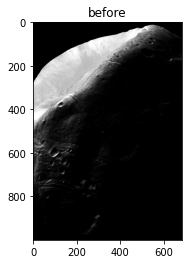

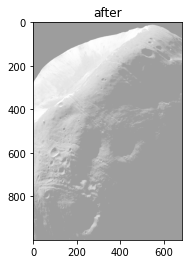

In [ ]:
image = cv2.imread('Fig0210(a).tif')
image = image[:, :, 0]
Lmax = np.amax(image)
Lmin = np.amin(image)
shape = image.shape[0] * image.shape[1]
#sorted = np.sort(image.copy(), axis=None)
hist = np.zeros(256)

for i in image.flatten():
  hist[int(i)] += 1

hist_norm = []
for i in hist:
   hist_norm.append(i / shape)

hist_cum_norm = []
history = 0
for i in hist_norm:
  hist_cum_norm.append(i + history)
  history += i

img_extended = []
for i in range(image.shape[0]):
  img_extended.append([])
  for j in range(image.shape[1]):
    img_extended[i].append(hist_cum_norm[pixel_values.index(image[i][j])] * 255)

img_extended = np.asarray(img_extended)

plt.title("before")
plt.imshow(image, cmap="gray")
plt.clim(0, 256)
plt.show()

plt.title("after")
plt.imshow(img_extended, cmap="gray")
plt.clim(0, 256)
plt.show()

3rd figure:

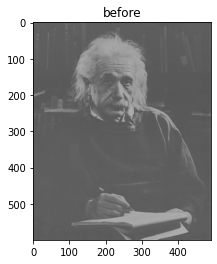

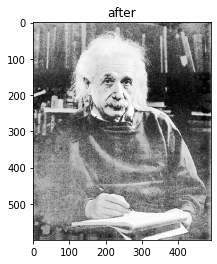

In [ ]:
image = cv2.imread('Fig0228(a).tif')
image = image[:, :, 0]
Lmax = np.amax(image)
Lmin = np.amin(image)
shape = image.shape[0] * image.shape[1]
#sorted = np.sort(image.copy(), axis=None)
hist = np.zeros(256)

for i in image.flatten():
  hist[int(i)] += 1

hist_norm = []
for i in hist:
   hist_norm.append(i / shape)

hist_cum_norm = []
history = 0
for i in hist_norm:
  hist_cum_norm.append(i + history)
  history += i

img_extended = []
for i in range(image.shape[0]):
  img_extended.append([])
  for j in range(image.shape[1]):
    img_extended[i].append(hist_cum_norm[pixel_values.index(image[i][j])] * 255)

img_extended = np.asarray(img_extended)

plt.title("before")
plt.imshow(image, cmap="gray")
plt.clim(0, 256)
plt.show()

plt.title("after")
plt.imshow(img_extended, cmap="gray")
plt.clim(0, 256)
plt.show()

# Consignes
Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi à 19h


In [ ]:
# bonne chance